<a href="https://colab.research.google.com/github/abdessamed122/1-st-projet-with-API/blob/main/50_startups_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
files.upload()  # Allows you to manually upload the file


Saving 50_Startups.csv to 50_Startups.csv


{'50_Startups.csv': b'R&D Spend,Administration,Marketing Spend,State,Profit\r\n165349.2,136897.8,471784.1,New York,192261.83\r\n162597.7,151377.59,443898.53,California,191792.06\r\n153441.51,101145.55,407934.54,Florida,191050.39\r\n144372.41,118671.85,383199.62,New York,182901.99\r\n142107.34,91391.77,366168.42,Florida,166187.94\r\n131876.9,99814.71,362861.36,New York,156991.12\r\n134615.46,147198.87,127716.82,California,156122.51\r\n130298.13,145530.06,323876.68,Florida,155752.6\r\n120542.52,148718.95,311613.29,New York,152211.77\r\n123334.88,108679.17,304981.62,California,149759.96\r\n101913.08,110594.11,229160.95,Florida,146121.95\r\n100671.96,91790.61,249744.55,California,144259.4\r\n93863.75,127320.38,249839.44,Florida,141585.52\r\n91992.39,135495.07,252664.93,California,134307.35\r\n119943.24,156547.42,256512.92,Florida,132602.65\r\n114523.61,122616.84,261776.23,New York,129917.04\r\n78013.11,121597.55,264346.06,California,126992.93\r\n94657.16,145077.58,282574.31,New York,125370

In [4]:
df = pd.read_csv('50_Startups.csv')


In [5]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.shape

(50, 5)

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.corr(numeric_only=True)


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


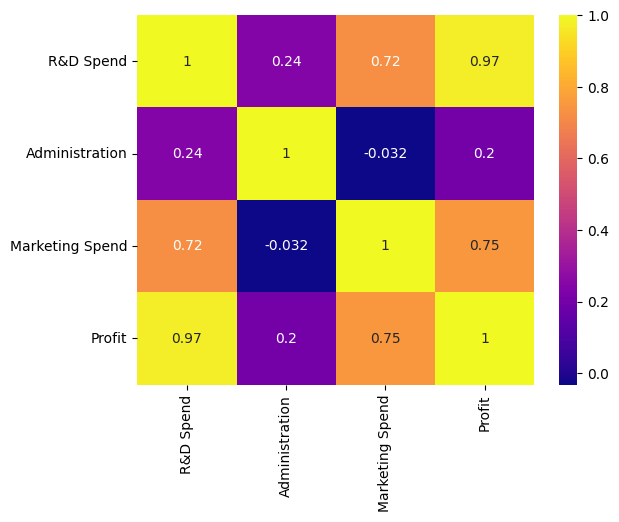

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='plasma')
plt.show()

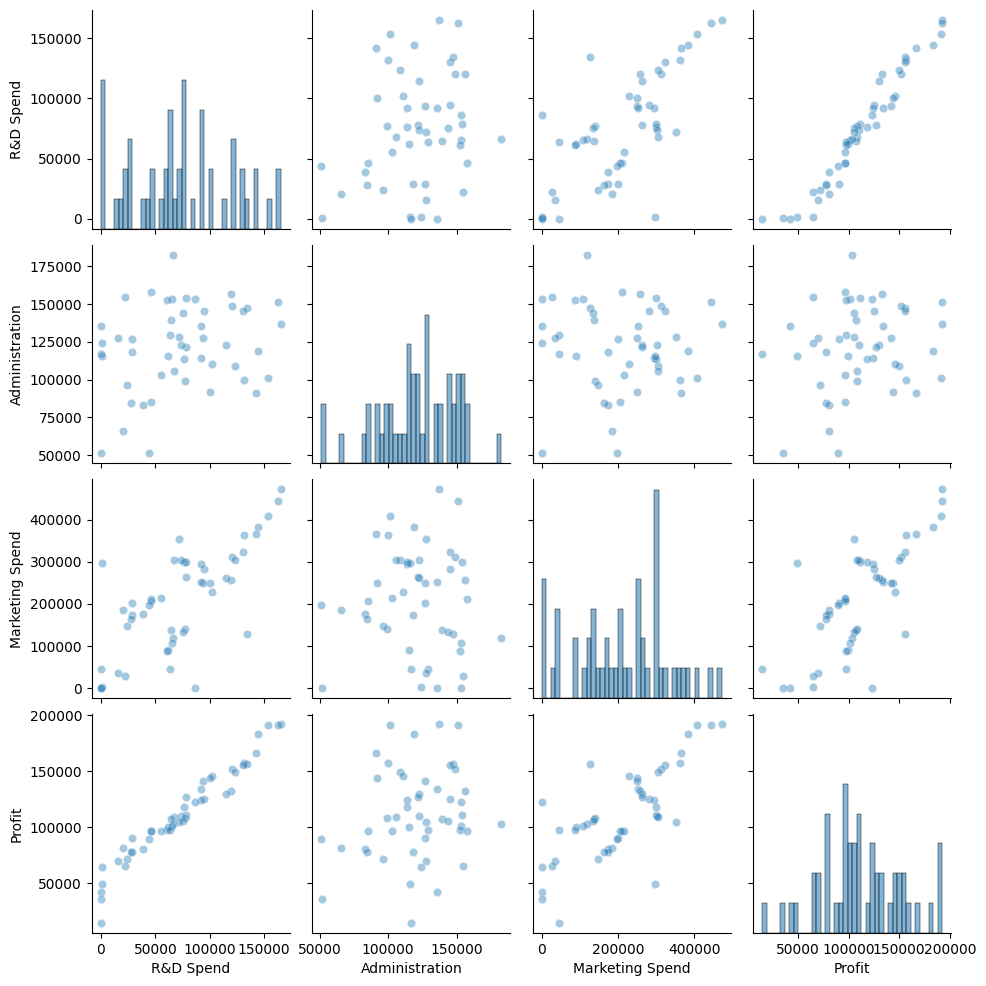

In [13]:
sns.pairplot(df,
             kind='scatter',
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55, 'bins':40})

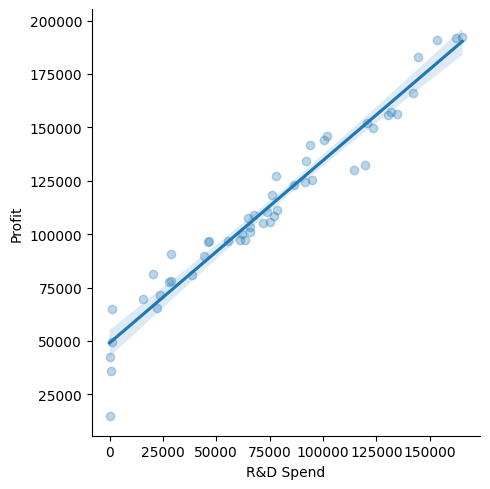

In [14]:
sns.lmplot(x='R&D Spend',
           y='Profit',
           data=df,
           scatter_kws={'alpha':0.3})

<ipython-input-15-fc264ded9075>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='Profit', data=df, palette='Set2')


<Axes: xlabel='State', ylabel='Profit'>

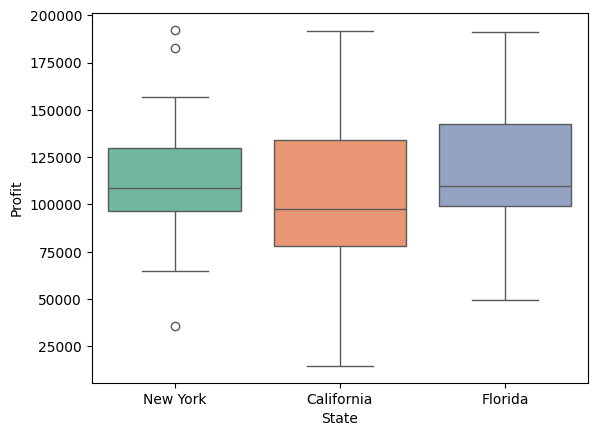

In [15]:
sns.boxplot(x='State', y='Profit', data=df, palette='Set2')

In [16]:
x=df[['R&D Spend','Administration','Marketing Spend']]
y=df['Profit']

x= x.to_numpy()
y= y.to_numpy()
y= y.reshape(-1,1)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
# df =pd.DataFrame(pd={'Predicted Profit': y_pred.flatten()})
# print(df.head())
df = pd.DataFrame({'Predicted Profit': y_pred.flatten()})
print(df.head())

   Predicted Profit
0     125972.148263
1      85471.922710
2      98924.151683
3      46639.786287
4     128142.124732


In [19]:
testing_data_model_score = model.score(x_test,y_test)
print("model score/performance on testing data ",testing_data_model_score)
training_data_model_score= model.score(x_train,y_train)
print("model score /performance in training data ",training_data_model_score)



model score/performance on testing data  0.9418819530700165
model score /performance in training data  0.9508557563847194


In [22]:
df = pd.DataFrame({'Actual Profit': y_test.flatten(), 'Predicted Profit': y_pred.flatten()})
# print(df.head())
df

,Actual Profit,Predicted Profit
0,134307.35,125972.148263
1,81005.76,85471.922710
2,99937.59,98924.151683
3,64926.08,46639.786287
4,125370.37,128142.124732
5,35673.41,52602.190537
6,105733.54,108364.697602
7,107404.34,100331.588469
8,97427.84,97538.566747
9,122776.86,112496.703984


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2*100)
print("Mean Squared Error (MSE):", mse*100)

R-squared (R2) Score: 94.18819530700165
Mean Squared Error (MSE): 8177214943.547146


In [24]:
 from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 7222.594346965514
